NOTE TO GRADER: It is my understanding tht a pdf of my Jupyter Notebook is sufficient for submission. Please let me know if you would like, and I am happy to send you my code. Have a great day! - Justin A

NOTE TO GRADER: Analysis of Part 2, 3, and 4 is all in part 5 at the end. Please also see the additional PDF containing result tables.

PART 1: 
- Go to Kaggle.com. 
- Find a text classification data set that interests you. Divide into train/test.
- Create a graph showing the distribution of the target classes. 
- Describe the data set and what the model should be able to predict.

DESCRIPTION OF DATA SET + WHAT MODEL SHOULD BE ABLE TO PREDICT

- The original data set consists of 487K+ text entries that are either written by humans or AI generated. 
- Distribution: 306K by human author, 181K AI gen. 
- For this assignment, the first 120K entries were used. 
- Distribution: 66K human author, 54K AI Gen. 
- The model should be able to predict the category: human author or AI generated.
- Source: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text

In [1]:
# IMPORT DATA FROM .CSV FILE, AND PUT IT IN LIST "DATA"
import csv
import os
from itertools import islice

# Get the current working directory
current_directory = os.getcwd()
dataset_filename = "AI_Human.csv"
dataset_file_path = os.path.join(current_directory, dataset_filename)

data = []
with open(dataset_file_path, 'r', encoding = 'utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in islice(csv_reader,120000):
        # Append csv row to data list
        data.append(row)

In [2]:
# SPLIT DATA INTO TRAIN AND TEST
import sklearn
from sklearn.model_selection import train_test_split

# Extract 'headline' and 'is_sarcastic' from each dictionary in the data list
text = [entry['text'] for entry in data]
ai_generated = [int(float(entry['generated'])) for entry in data]

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(text, ai_generated, test_size=0.10, random_state=92)

print("Several values of x_train:")
for text in x_train[:10]:
    print(text[:100])

print("\nSeveral values of y_train:")
print(y_train[:20])

Several values of x_train:
no one is evan going to read these things so there is no point in doing this test it is wasting ever


Car-free cities, as the term itself suggests, imply urban environments where automobiles play a li
Studies have shown that enforcing curfews for tanagers can half caducei they likelihood of that gett
My opinion is that we be able to vote saying the most popular votes win because why would we give ar
The Advantages and Disadvantages of Using Technology in the Classroom

As technology Continues to ad
Dear State Senator,

As a 9th grade student, I am writing to express my opinion on the matter of the
Honestly this would raise test scores because you are encouraging student to work harder, so they ca
Technology has revolutionized the way we live Our lives, and its impact Kn individuals' lives has be
 Have you ever wondered what would happen if you knew more about something you liked, something you 
 As we journey through life, OT Os essential to cultivate the ri

ai_gen_count:54344
not_ai_gen_count:65656


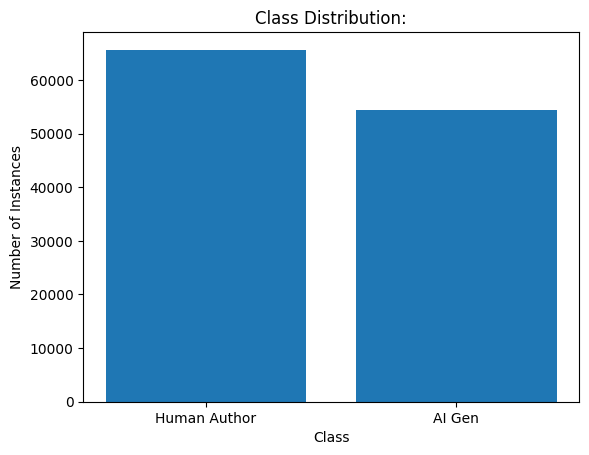

In [3]:
# PLOT THE CLASSIFICATION DISTRIBUTION IN A HISTOGRAM
import matplotlib.pyplot as plt

# count occurrences of each class (0: not ai_generated, 1: ai_generated)
ai_gen_count = sum(y_train) + sum(y_test)
not_ai_gen_count = len(y_train) + len(y_test) - ai_gen_count

print(f"ai_gen_count:{ai_gen_count}")
print(f"not_ai_gen_count:{not_ai_gen_count}")

# graph showing distribution of target classes
plt.bar(['Human Author', 'AI Gen'],[not_ai_gen_count, ai_gen_count])
plt.title('Class Distribution:')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

PART 2: CREATE A SEQUENTIAL MODEL AND EVALUATE ON THE TEST DATA

ATTEMPT 1: "BASIC SEQUENTIAL"

In [37]:
# Tokenize, convert to sequences, and pad text to be ready for neural network
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from itertools import islice

# initialize and fit the tokenizer on the training data
num_words1 = 200
tokenizer = Tokenizer(num_words = num_words1)#10000)
tokenizer.fit_on_texts(x_train)

for word, index in islice(tokenizer.word_index.items(), 10):
    print(f'{word}: {index}')

# convert texts to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# pad the text sequences
max_length = 100
x_train_padded = pad_sequences(x_train_sequences, maxlen = max_length, padding = 'post', truncating = 'post')
x_test_padded = pad_sequences(x_test_sequences, maxlen = max_length, padding = 'post', truncating = 'post')

# convert to numpy arrays
x_train_padded = np.array(x_train_padded)
x_test_padded = np.array(x_test_padded)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'x_train_padded:{x_train_padded[:1]}')

the: 1
to: 2
and: 3
a: 4
of: 5
in: 6
that: 7
is: 8
it: 9
for: 10
x_train_padded:[[111  49   8 148   2  70 122  61  37   8 111   6 188  18   9   8  57  14
    3  29   4   5  16   4  29  14  19  84 104  16   1   8  61  85 110  40
   25  17   1 105 191  61  47   9   2  81  15  63   2 109  37 125   2 134
   24  13  50  40  63  15 102  72   1   5 109  17  17   2  85  22  37   3
   17 111 111  77  29  29  32 175  18 112   8   3  29  14   1 188   9 111
    1  19   1  19   1  41 109   1 138   8]]


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.metrics import Precision, Recall
#from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(input_dim = num_words1, output_dim = 128))# output_dim in the table refers tthis output_dim
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy', Precision(), Recall()])

#set up early stopping so that the model stops if test metrics stop improving (to avoid overfitting)
#early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(x_train_padded, y_train, epochs=5, validation_data = (x_test_padded, y_test))#, callbacks=[early_stopping])

results = model.evaluate(x_test_padded, y_test)
print(dict(zip(model.metrics_names, results)))

Epoch 1/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9395 - loss: 0.1603 - precision_1: 0.9521 - recall_1: 0.9104 - val_accuracy: 0.9703 - val_loss: 0.0827 - val_precision_1: 0.9699 - val_recall_1: 0.9649
Epoch 2/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9710 - loss: 0.0784 - precision_1: 0.9735 - recall_1: 0.9624 - val_accuracy: 0.9737 - val_loss: 0.0731 - val_precision_1: 0.9866 - val_recall_1: 0.9552
Epoch 3/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9760 - loss: 0.0661 - precision_1: 0.9782 - recall_1: 0.9687 - val_accuracy: 0.9797 - val_loss: 0.0585 - val_precision_1: 0.9791 - val_recall_1: 0.9762
Epoch 4/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9813 - loss: 0.0540 - precision_1: 0.9824 - recall_1: 0.9761 - val_accuracy: 0.9787 - val_loss: 0.0567 - val_precision_1: 0.9844 - val_recall_1: 0.9688
Epoch 5/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9828 - loss: 0.0475 - precision_1: 0.9842 - recall_1

PART 3: TRY A DIFFERENT ARCHITECTURE LIKE RNN, CNN, LSTM, ETC AND EVALUATE ON THE TEST DATA

ATTEMPT 2: RNN

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(input_dim = num_words1, output_dim = 128))#, input_length = max_length))
model.add(SimpleRNN(128))
#model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

model.fit(x_train_padded, y_train, epochs=5, validation_data = (x_test_padded, y_test))#, callbacks=[early_stopping])

model.evaluate(x_test_padded, y_test)

Epoch 1/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 0.8090 - loss: 0.4142 - val_accuracy: 0.8937 - val_loss: 0.3176
Epoch 2/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 59s 17ms/step - accuracy: 0.7993 - loss: 0.4436 - val_accuracy: 0.9150 - val_loss: 0.2622
Epoch 3/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 59s 18ms/step - accuracy: 0.8209 - loss: 0.4044 - val_accuracy: 0.9030 - val_loss: 0.2727
Epoch 4/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 59s 18ms/step - accuracy: 0.8099 - loss: 0.4268 - val_accuracy: 0.7418 - val_loss: 0.5459
Epoch 5/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 68s 20ms/step - accuracy: 0.8307 - loss: 0.4075 - val_accuracy: 0.8478 - val_loss: 0.3347
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8446 - loss: 0.3387


[0.3347378373146057, 0.8477500081062317]

ATTEMPT 3: CNN

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.metrics import Precision, Recall

model = Sequential()
model.add(Embedding(input_dim=num_words1, output_dim=128))
model.add(Conv1D(128, 5, activation='relu'))  # Convolutional layer
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy', Precision(), Recall()])

model.fit(x_train_padded, y_train, epochs=2, validation_data = (x_test_padded, y_test))#, callbacks=[early_stopping])

results = model.evaluate(x_test_padded, y_test)
print(dict(zip(model.metrics_names, results)))

Epoch 1/2


3375/3375 ━━━━━━━━━━━━━━━━━━━━ 62s 18ms/step - accuracy: 0.9415 - loss: 0.1407 - precision_2: 0.9509 - recall_2: 0.9135 - val_accuracy: 0.9861 - val_loss: 0.0405 - val_precision_2: 0.9889 - val_recall_2: 0.9804
Epoch 2/2
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 63s 19ms/step - accuracy: 0.9886 - loss: 0.0337 - precision_2: 0.9895 - recall_2: 0.9853 - val_accuracy: 0.9897 - val_loss: 0.0301 - val_precision_2: 0.9914 - val_recall_2: 0.9859
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9866 - loss: 0.0383 - precision_2: 0.9890 - recall_2: 0.9812
{'loss': 0.030137520283460617, 'compile_metrics': 0.9896666407585144}


ATTEMPT 4: LSTM

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(input_dim=num_words1, output_dim=128))
model.add(LSTM(128))  # LSTM layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

model.fit(x_train_padded, y_train, epochs=5, validation_data = (x_test_padded, y_test))#, callbacks=[early_stopping])

model.evaluate(x_test_padded, y_test)

Epoch 1/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 187s 54ms/step - accuracy: 0.9303 - loss: 0.1784 - val_accuracy: 0.9703 - val_loss: 0.0878
Epoch 2/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 185s 55ms/step - accuracy: 0.9700 - loss: 0.0874 - val_accuracy: 0.9688 - val_loss: 0.0910
Epoch 3/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 183s 54ms/step - accuracy: 0.9762 - loss: 0.0678 - val_accuracy: 0.9749 - val_loss: 0.0688
Epoch 4/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 185s 55ms/step - accuracy: 0.9819 - loss: 0.0533 - val_accuracy: 0.9817 - val_loss: 0.0524
Epoch 5/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 187s 55ms/step - accuracy: 0.9856 - loss: 0.0428 - val_accuracy: 0.9848 - val_loss: 0.0491
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9833 - loss: 0.0539


[0.0491107739508152, 0.9848333597183228]

PART 4: TRY DIFFERENT EMBEDDING APPROACHES FOR YOUR BEST PERFORMING MODEL IN STEP 3, AND EVALUATE ON THE TEST DATA

BEST PERFORMING MODEL: CNN WITH 2 EPOCHS

ATTEMPT 5: DIFFERENT EMBEDDING APPROACHES WITH CNN WITH 2 EPOCHS

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.metrics import Precision, Recall

model = Sequential()
model.add(Embedding(input_dim=num_words1, output_dim=2)) #output_dim in the table refers to this line
model.add(Conv1D(128, 5, activation='relu'))  # Convolutional layer
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy', Precision(), Recall()])

model.fit(x_train_padded, y_train, epochs=2, validation_data = (x_test_padded, y_test))#, callbacks=[early_stopping])

results = model.evaluate(x_test_padded, y_test)
print(dict(zip(model.metrics_names, results)))

Epoch 1/2
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8956 - loss: 0.2500 - precision_10: 0.9001 - recall_10: 0.8550 - val_accuracy: 0.9387 - val_loss: 0.1601 - val_precision_10: 0.9351 - val_recall_10: 0.9300
Epoch 2/2
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9382 - loss: 0.1655 - precision_10: 0.9365 - recall_10: 0.9261 - val_accuracy: 0.9269 - val_loss: 0.1850 - val_precision_10: 0.8796 - val_recall_10: 0.9730
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9284 - loss: 0.1876 - precision_10: 0.8808 - recall_10: 0.9733
{'loss': 0.1850082129240036, 'compile_metrics': 0.9269166588783264}


PART 5: ANALYSIS OF PREVIOUS PARTS
- See additional PDF for evaluation tables.

ANALYSIS OF PART 2:
- While not explitly required, I decided to test 21 different versions of my original sequential model. As shown in the additional PDF's evaluation tables, I varied epochs, Num. of Words in Tokenizer, and Text Sequence Max Length. (Here, Num. of Words in tokenizer is how many of the most frequent words across training data were used in the model. Text Sequence Max Length is the length of the test sequence used to classify each instance as AI or human authored.)
- Using accuracy by itself, I compared different options and selected one
- After that, I calculated precision and recall of the selected option to confirm they were good
- This is a remarkable data set - even with only 1 epoch, 5 words in the tokenizer, and a text sequence length of 5, it still achieved ***59% accuracy***! That's astonishing.
- Full results can be seen in the additional PDF's table.
- Increasing epochs from 1 to 5 to 10 had almost no impact
- Num. of Words in Tokenizer and Text Sequence Max Length were increased together, and each increase had a noticeable impact until diminishing returns were hit at 800 words in tokenizer and text sequence max length of 100. This combination achieved 98.18% accuracy, so further returns were increasingly diminished simply because there wasn't much room left to improve. 
- Even 10000 words in tokenizer only did a little better.
- With 800 words in tokenizer and text sequence max length of 100 chosen, precision and recall were found to be a reasonable 98.7% and 96.5%
- Overall, these 96-98% results for accuracy/precision/recall indicate that the data set certainly does have sufficient information to classify nearly all data entries properly.
- Again, see the additional PDF's table for full results.
- This 800+100 pair of parameters, with 5 epochs, was chosen for comparison in part 3.

ANALYSIS OF PART 3:
- The following models were tried at 800 words in tokenizer, 100 text sequence max length, and 5 and sometimes 2 epochs: RNN+Dense Layer, RNN, CNN, LSTM
- Full results can be seen in the additional PDF's table.
- The basic sequential model, from Part 2, was the benchmark with 98.183% accuracy
- RNN+Dense layer performed most poorly, with 70.7% accuracy! This is likely due to overfitting.
- RNN was next most poor performing, with 84.8% accuracy. Again, overfitting may play a role here.
- Since the two worst performing models were the RNNs, it is likely that their ability to maintain "memory" of previous inputs is actually harmful in this exercise. What does that mean? It means that remembering and focusing on key words from way way back early in the text actually makes it harder for the model to distinguish between human author and AI author. For whatever reason, these results suggest that a long memory makes human and AI authored works seem more similar - where as the basic sequential model, which is more focused on word counts overall, does not run into this trouble and hence earns more accuracy.
- But, oddly, LSTM performed slightly better than basic sequential (about 0.4% higher accuracy), which strongly implies that it's long term memory was not a hidrance, and possibly even a minor asset. I have no idea why this is. It may be due to: an uncaught bug in the code, some unidentified weakness in RNNs unrelated to my early thoughts on them, or something else entirely. Perhaps the Tensorflow Keras LSTM model has some ability to turn off it's memory that the RNNs lack. That would allow it to bypass the problems I outlined in the previous bullet. This whole issue is a head scratcher.
- Finally, the two best performing models were CNN with 5 and 2 epochs. This may indicate that their ability to recognize spatial patterns in the data may give them a slight edge.
- Bizarrely, the 2 epoch CNN outperformed the 5 epoch CNN. It seems likely that this is due either to slight over fitting, or else is due to random noise. (their accuracies are very close to each other - within 0.017%!)
- The small number of epochs is likely because the data set - 120K entries - is huge, meaning that each epoch covers a lot of ground.
- Frankly, sharing 800 words in tokenizer and 100 text sequence max length, all of basic sequential, LSTM, and CNN performed between 98% and 99%, which seems to indicate that the model choice was relatively unimportant. Regardless of the model, the data left siginificant enough "clues" that multiple models were able to achieve simliarly high accuracy.
- Nonetheless, the CNN with 2 epochs model was chosen 

ANALYSIS OF PART 4:
- Finally, different embeding approaches were done. First, the number of words in teh tokenizer was varied from 800 down to just 5. With a number selected, the next cange was to vary the output dimensions of the embedding layer from 128 down to just 2.
- See full results in the additional PDF's table.
- Number of words in tokenizer: Accuracy did not decrease significantly from 800 to 600 to 400 and even down to 200. Only at 100 and below did accuracy begin to decrease more significantly. So, 200 words in tokenizer was selected for efficiency.
- Output dimensions of the embedding layer was 128 for all previous models mentioned in Parts 2, 3, and 4.
- Here, it was singularly bumped up to 256, and also decreased to 64, 32, 16, 8, 4, and 2.
- Accuracy loss was minimal down to output_dim = 16, so this was chosen for efficiency.
- The 200 words in tokenizer, 16 output dimensions for embedding layer, 2 epoch CNN model was the final model chosen. Accuracy: 97.175%, Precision: 97.060%, Recall: 97.080%
- What can we learn from these parameters?
- First, the 200 words in tokenizer maintaining high accuracy suggests that when words across all samples are sorted by frequency, only the top 200 most frequent words are needed to classify the data with a high accuracy, precision, etc. In other words, word 201 and on are just not that important.
- It may be true that very few of the top 200 words are important. Testing was not done on top 120, 140, 160, 180, etc - the closest lower grouping was 100. But, 100 did suffer lower accuracy, indicating that on top of several words in the top 100 being important, at least *some* word in the 101-200 range is also important
- The 16 output dimensions for embedding layer suggests that whatever important information this list of 200 words contains - it is quite compressible. Perhaps only a handful of the top 200 words are needed, or perhaps more are needed but the equations somehow compress them.
- It was determined in Part 2, but it's worth noting that the 100 word max text sequence indicates that the classification's hand is sufficiently "revealed" after just 100 key words from the top 200 list. Additional words provide minimal improvement.

OVERALL TAKEAWAY
- Overall, this AI text generator is bad at it's job. A simple separate AI programmed by a grad student for a homework assignment can sniff out this AI text generator with 98% accuracy through a not-that-complicated process. That means this AI is leaving clear clues that human authors are not. The poor quality of the original AI text generator - it's inability to hide itself amongst real human writing - is probably the plainest takeaway from this investigation. While it may fool humans, when another AI comes to snoop for clues, they stick out as clearly as a ketchup stain on a white shirt.
- Surely analysis of my neural networks would reveal the clues they find, which themselves would point the way towards making an AI that can mimic human authors more accurately.